In [18]:
df<-read.csv('d:/data/cancer/data.csv')
head(df)

id,diagnosis,class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [19]:
library(dplyr)
df<-df %>% select(-id,-diagnosis)
# 0양성, 1 악성
dim(df)
head(df)

[1] 569  31

class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440



  0   1 
357 212 

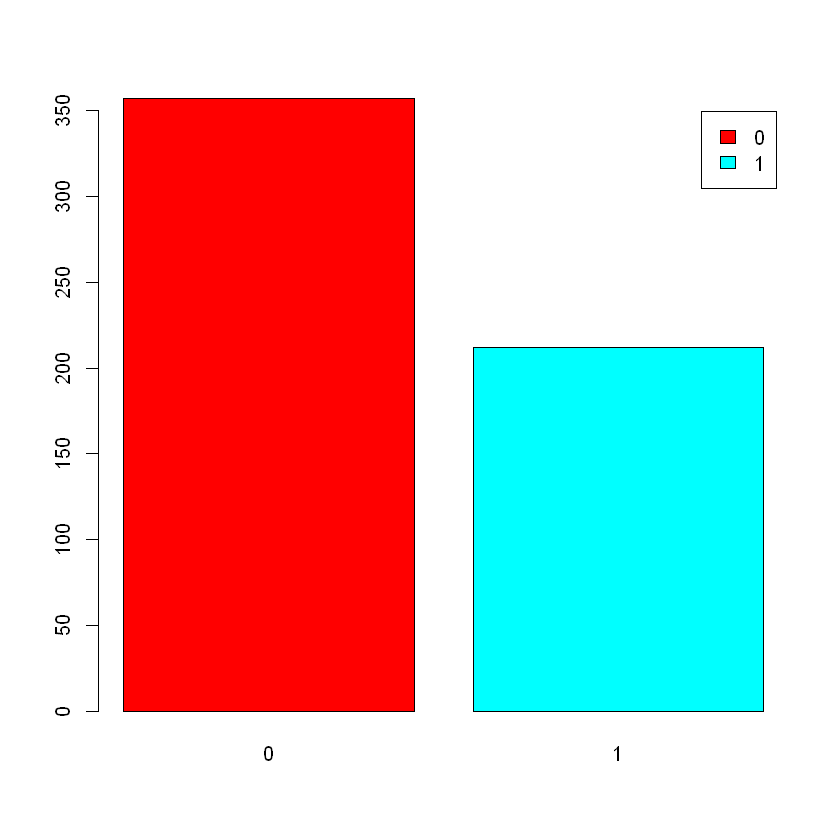

In [20]:
(tbl<-table(df$class))
barplot(tbl,beside=T,legend=T,col=rainbow(2))

In [21]:
library(ROSE)
#언더샘플링
df_samp<-ovun.sample(class~., data=df, seed=1, method='under',
                    N=212*2)$data
tbl<-table(df_samp$class)
tbl


  0   1 
212 212 

In [22]:
library(caret)
set.seed(123)
#학습용:검증용 8:2로 구분
idx_train <- createDataPartition(y=df_samp$class, p=0.8,
                                list=F)
train<-df_samp[idx_train,]
X_train<-train[,-1]
y_train<-train[,1]
test<-df_samp[-idx_train,]
X_test<-test[,-1]
y_test<-test[,1]

k,accuracy
1,0.8452381
2,0.8690476
3,0.8452381
4,0.8571429
5,0.8928571
6,0.8809524
7,0.8928571
8,0.8809524
9,0.8928571
10,0.8928571


,k,accuracy
5,5,0.8928571


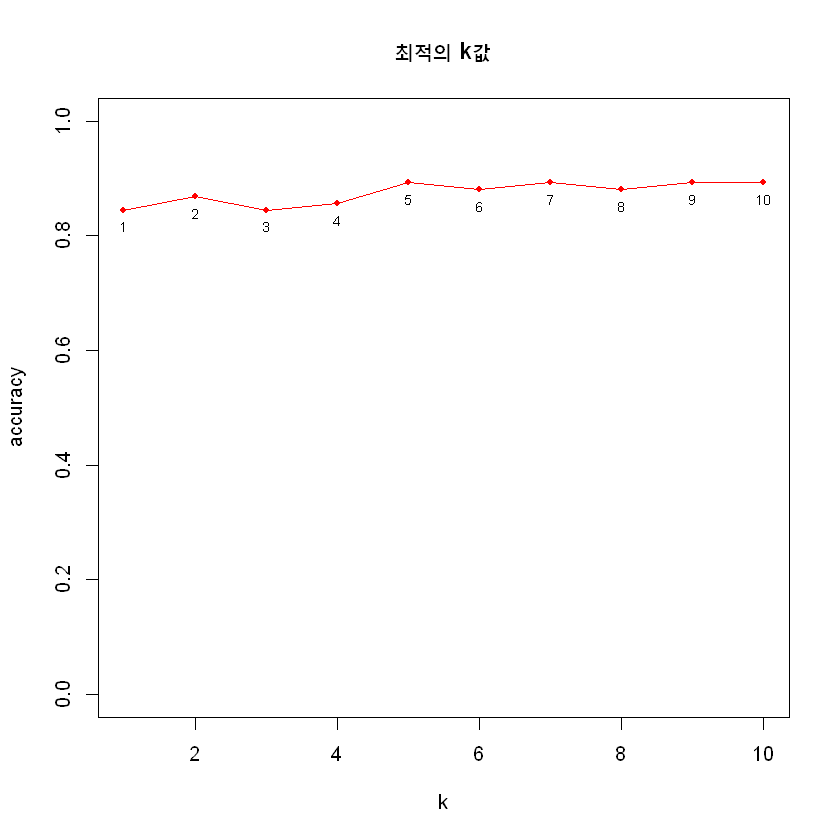

In [25]:
library(class)
acc<-NULL #비어있는 벡터
for ( i in c(1:10)){ #k 값을 1~10 까지 증가시키면서 예측정확도 비교
    set.seed(123)
    pred=knn(train=train,test=test,cl=y_train,k=i)
    #벡터에 결과값 추가
    acc<-c(acc,mean(y_test == pred))
}
df<-data.frame(k=c(1:10), accuracy=acc) #데이터프레임 생성
plot(accuracy ~ k , data=df, type='o',pch=20, main='최적의 k값',
    ylim=c(0,1),col='red')
#그래프에 라벨 추가
with(df,text(accuracy ~ k, labels=c(1:10),pos=1,cex=0.7))
df
#정확도가 가장 높은 k의 값 구하기
n<-min(df[df$accuracy %in% max(acc),'k'])
df[n,]

In [24]:
library(class)
set.seed(123)
#최적의 k 값으로 모형을 만들고 예측 정확도 확인
pred<-knn(train=train, test=test, cl=y_train, k=n)
table(y_test,pred)
mean(y_test==pred)

      pred
y_test  0  1
     0 39  3
     1  6 36

[1] 0.8928571